# Time Series Manipulation Exercises

In this notebook we'll explore 5 datasets from `vega_datasets`
1. `sf_temps`
1. `seattle_weather`
1. `flights_20k`
1. `iowa_electricity`
1. `birdstrikes`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prepare import prep_sf_temps, resample_temperature
from explore import sf_temp_plots
from vega_datasets import data


# Temperature in San Francisco

In [2]:
data.sf_temps.description

'This dataset contains hourly temperatures in San Francisco during the full year of 2010. The dataset is drawn from public-domain `NOAA data <https://www.weather.gov/disclaimer>`_, and transformed using scripts available at http://github.com/vega/vega_datasets/.'

In [3]:
# load the san francisco dataset
df_sf_temps = data.sf_temps()

# prepare the san francisco dataset
df = prep_sf_temps(df_sf_temps)
df = resample_temperature(df)

## 1.
> Resample by the day and take the average temperature. Visualize the average temperature over time.

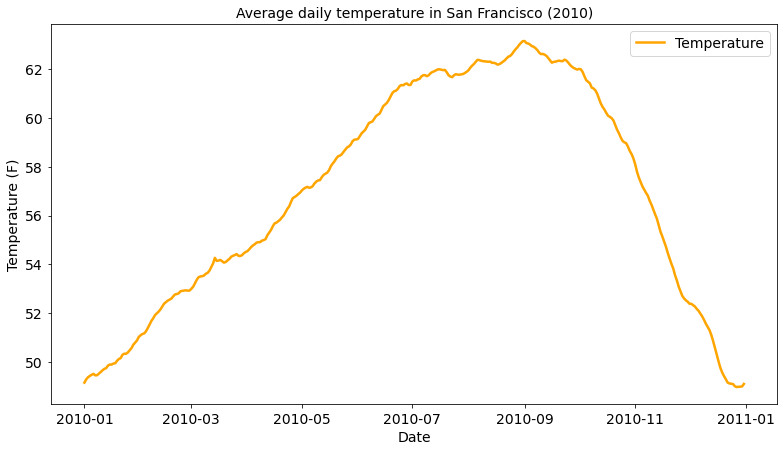

In [4]:
sf_temp_plots(df, visual='mean')

## 2.
> Write the code necessary to visualize the minimum temperature over time.

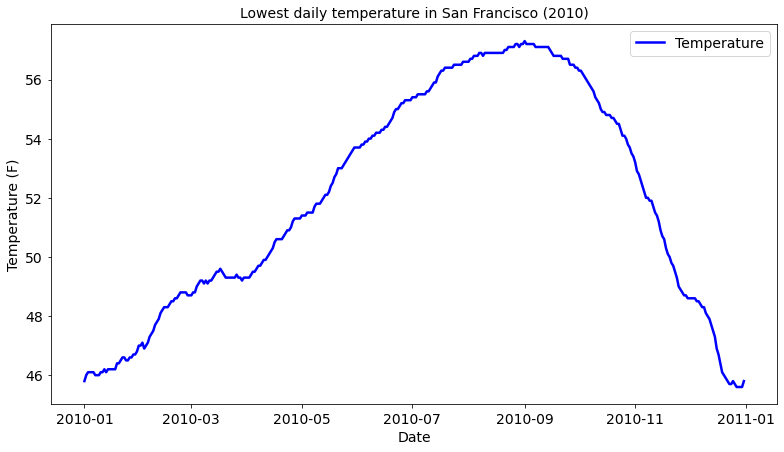

In [5]:
sf_temp_plots(df, visual='min')

## 3. 
> Write the code necessary to visualize the maximum temperature over time.

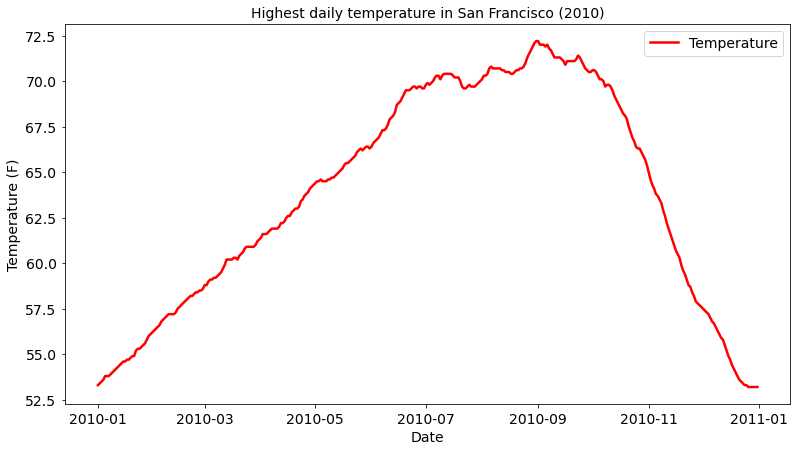

In [6]:
sf_temp_plots(df, visual='max')

## 4.
> Which month is the coldest, on average?

In [7]:
monthly_temps = df.resample('M').mean()

In [8]:
monthly_temps

,min,mean,max
date,,,
2010-01-31,46.309677,49.984140,54.651613
2010-02-28,48.064286,52.243899,57.550000
2010-03-31,49.238710,53.956948,60.093548
2010-04-30,50.326667,55.633056,62.646667
2010-05-31,52.403226,57.970968,65.312903
2010-06-30,54.480000,60.444722,68.430000
2010-07-31,56.045161,61.765457,70.022581
2010-08-31,56.941935,62.405376,70.812903
2010-09-30,56.903333,62.487083,71.306667


In [9]:
coldest_month = monthly_temps.idxmin()[0]
coldest_month = coldest_month.strftime('%B')

print(f"{coldest_month} was the coldest month on average in 2010.")

January was the coldest month on average in 2010.


## 5.
> Which month has the highest average temperature?

In [10]:
hottest_month = monthly_temps.idxmax()[0]
hottest_month = hottest_month.strftime('%B')

print(f"{hottest_month} was the hottest month on average in 2010.")

August was the hottest month on average in 2010.


## 6a.
> Resample the d
ata by day and calculate the min and max temperature. Use this resampled dataframe to calculate the range of temperatures for each day.

In [11]:
high_low_temps = df[['min', 'max']]

In [12]:
high_low_temps = (
    
high_low_temps.assign(
    variability = high_low_temps['max'] \
                  - high_low_temps['min'])
    
)

In [13]:
high_low_temps.head()

,min,max,variability
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


## 6b.
>Which month has the highest daily temperature variability?

In [14]:
monthly_variable_max_temps = high_low_temps.resample('M')['variability'].agg(['max'])

In [15]:
monthly_variable_max_temps

,max
date,
2010-01-31,9.3
2010-02-28,9.9
2010-03-31,12.0
2010-04-30,13.0
2010-05-31,13.1
2010-06-30,14.8
2010-07-31,14.8
2010-08-31,15.0
2010-09-30,14.9


In [16]:
monthly_most_variable = monthly_variable_max_temps.idxmax()[0].strftime('%B')

In [17]:
print(f"{monthly_most_variable} had the highest daily temperature variability in 2010.")

August had the highest daily temperature variability in 2010.


## 7. Bonus
Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

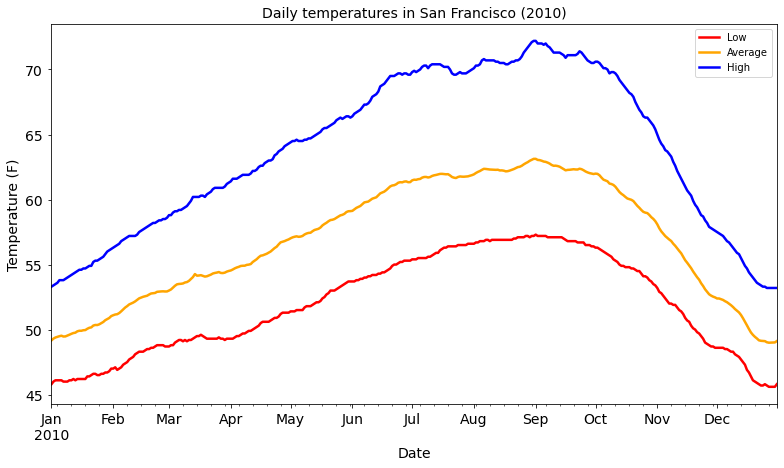

In [18]:
sf_temp_plots(df, 'all')

# Seattle Weather

In [19]:
data.seattle_weather.description

'This dataset contains precipitation totals, temperature extremes, wind speed, and weather type recorded daily in Seattle from 2012 to 2015. The dataset is drawn from public-domain `NOAA data <https://www.weather.gov/disclaimer>`_, and transformed using scripts available at http://github.com/vega/vega_datasets/.'

In [20]:
df_seattle = data.seattle_weather()

In [21]:
df_seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [22]:
df_seattle = df_seattle.set_index('date').sort_index()

In [23]:
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


## 1. 
Which year and month combination has the highest amount of precipitation?

In [24]:
monthly_total_precipitation = df_seattle.resample('M')['precipitation'].agg(['sum'])
date_of_most_percipitation = monthly_total_precipitation.idxmax()[0].strftime('%B %Y')
highest_amount_of_percipitation = monthly_total_precipitation.max()[0]

In [25]:
print(f'The month and year with the highest recorded percipitation: {date_of_most_percipitation}')
print(f'Amount of percipitation: {highest_amount_of_percipitation:.2f}in of rain')

The month and year with the highest recorded percipitation: December 2015
Amount of percipitation: 284.50in of rain


## 2.
Visualize the amount of monthly precipitation over time.

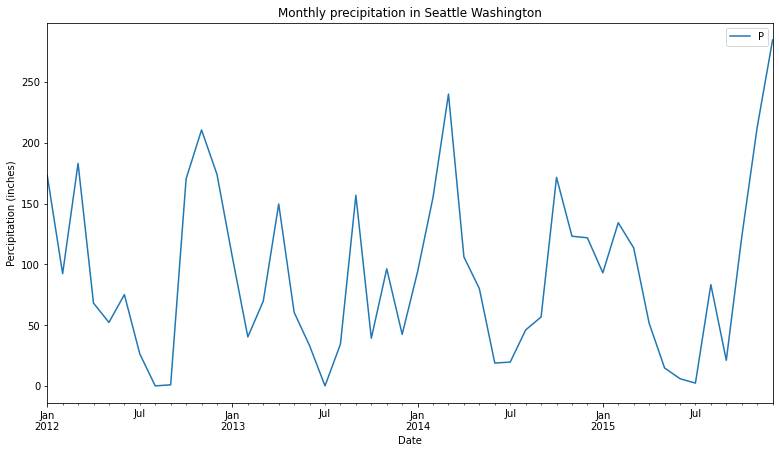

In [26]:
monthly_total_precipitation.plot(figsize=(13, 7),
                                 title='Monthly precipitation in Seattle Washington')

plt.xlabel('Date')
plt.ylabel('Percipitation (inches)')
plt.legend(('Percipitation'));

## 3.
Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [27]:
monthly_average_windspeeds = df_seattle.resample('M')['wind'].agg(['mean'])

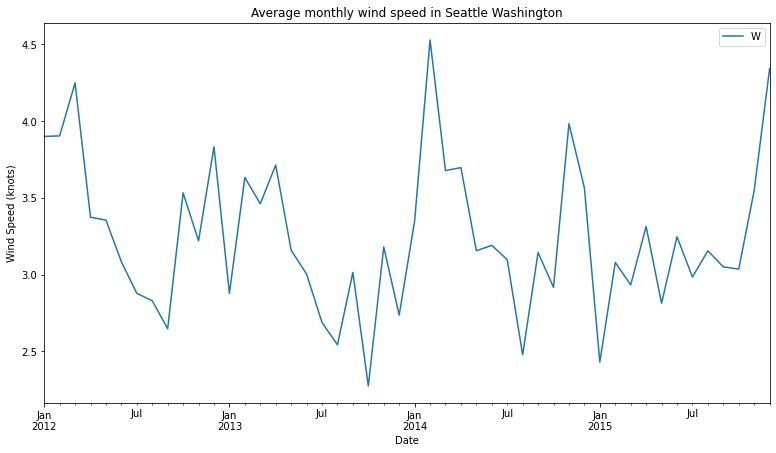

In [28]:
monthly_average_windspeeds.plot(figsize=(13, 7),
                                title='Average monthly wind speed in Seattle Washington')

plt.xlabel('Date')
plt.ylabel('Wind Speed (knots)')
plt.legend('Wind Speed');

## 4.
Which year-month combination is the windiest?

In [29]:
windiest_month = monthly_average_windspeeds.idxmax()[0].strftime('%B %Y')
windiest_month_average_windspeed = monthly_average_windspeeds.max()[0]

In [30]:
print(f'The windiest month and year recorded in Seattle: {windiest_month}')
print(f'Average windspeed: {windiest_month_average_windspeed:.2f} knots')

The windiest month and year recorded in Seattle: February 2014
Average windspeed: 4.53 knots


## 5.
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [31]:
sunny_years = (df_seattle.weather == 'sun').resample('Y').agg(['sum'])

In [32]:
sunniest_year = sunny_years.idxmax()[0].strftime('%Y')
number_of_sunny_days = sunny_years.max()[0]

In [33]:
print(f'The sunniest year on record in Seattle: {sunniest_year}')
print(f'Number of sunny days in {sunniest_year}: {number_of_sunny_days} days')

The sunniest year on record in Seattle: 2014
Number of sunny days in 2014: 211 days


In [34]:
# Professional way
df_seattle['is_sunny'] = df_seattle.weather == 'sun'

In [35]:
df_seattle.is_sunny.resample('Y').sum()

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: is_sunny, dtype: int64

## 6.
In which month does it rain the most?

In [36]:
# Professional way
df_seattle['month'] = df_seattle.index.month
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,1
2012-01-02,10.9,10.6,2.8,4.5,rain,False,1
2012-01-03,0.8,11.7,7.2,2.3,rain,False,1
2012-01-04,20.3,12.2,5.6,4.7,rain,False,1
2012-01-05,1.3,8.9,2.8,6.1,rain,False,1


In [37]:
df_precipitation_month = df_seattle.groupby([df_seattle.index.month], as_index=True).precipitation.sum()

In [38]:
print(f'The month with the most rain : {df_precipitation_month.idxmax()}')
print(f'The amount of rain that fell in November {df_precipitation_month.max():.2f}')

The month with the most rain : 11
The amount of rain that fell in November 642.50


## 7.
Which month has the most number of days with a non-zero amount of precipitation?

In [39]:
df_seattle['has_rain'] = (df_seattle.precipitation != 0).astype(np.int)

In [40]:
pct_days_nonzero_precip = df_seattle.groupby(['month']).has_rain.agg(['mean'])

In [41]:
highest_month_nonzero_pct_days = pct_days_nonzero_precip.idxmax()[0]
pct_precip = pct_days_nonzero_precip.max()[0]

In [42]:
print(('The month with the most number of days with non-zero' + \
      f' precipitation : {highest_month_nonzero_pct_days}'))
print(f'Percentage : {pct_precip:.2%}')

The month with the most number of days with non-zero precipitation : 12
Percentage : 65.32%


# `Flights`

In [43]:
df_flights = data.flights_20k()

In [44]:
df_flights = df_flights.set_index('date').sort_index()

In [45]:
df_flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


## 1.
Convert any negative delays to 0.

In [46]:
df_flights.delay = np.where(df_flights.delay < 0, 0, df_flights.delay)

In [47]:
df_flights.delay.value_counts().sort_index().head()

0    10516
1      198
2      507
3      577
4      389
Name: delay, dtype: int64

## 2.
Which hour of the day has the highest average delay?

In [48]:
hour_delay = df_flights.groupby([df_flights.index.hour], as_index=True).delay.agg(['mean'])
highest_average_delay = hour_delay.max()[0]
highest_delay_hour = hour_delay.idxmax()[0]

In [49]:
print(f"The hour of the day with the highest average delay : {highest_delay_hour}AM")
print(f"The average delay at {highest_delay_hour}AM : {highest_average_delay} mins")

The hour of the day with the highest average delay : 3AM
The average delay at 3AM : 302.5 mins


## 3.
Does the day of the week make a difference in the delay amount?

In [50]:
day_of_week_delay = df_flights.groupby([df_flights.index.day_name()], as_index=True).delay.agg(['mean'])

In [51]:
day_average_delay = day_of_week_delay.max()[0]
day = day_of_week_delay.idxmax()[0]

print(f"The day of the week with the highest average delay : {day}")
print(f"Average delay on {day} : {day_average_delay:.2f} mins")

The day of the week with the highest average delay : Friday
Average delay on Friday : 17.76 mins


## 4.
Does the month make a difference in the delay amount?

In [52]:
month_delay = df_flights.groupby([df_flights.index.month], as_index=True).delay.agg(['mean'])

In [53]:
monthly_average_delay = month_delay.max()[0]
month = month_delay.idxmax()[0]

In [54]:
# print(month)
month = 'February'

In [55]:
print(f"The month with the highest average delay : {month}")
print(f"Average delay : {monthly_average_delay:.2f} mins")

The month with the highest average delay : February
Average delay : 12.31 mins


In [56]:
# Professional way
df_flights.groupby(df_flights.index.month).delay.mean()

date
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

## BONUS

In [57]:
print(data.iowa_electricity.description)
df_iowa = data.iowa_electricity()

The state of Iowa has dramatically increased its production of renewable wind power in recent years. This file contains the annual net generation of electricity in the state by source in thousand megawatthours. The dataset was published in the public domain by the U.S. Energy Information Administration [1]_ and downloaded on May 6, 2018. It is useful for illustrating stacked area charts.


In [58]:
df_iowa = df_iowa.set_index('year').sort_index()

In [59]:
df_iowa.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


For each row, calculate the percentage of the year's total that energy source provided.

In [60]:
annual_net_generation = df_iowa.groupby([df_iowa.index.year], as_index=True).sum()

In [61]:
df_annual_source = df_iowa.set_index(df_iowa.index.year)

In [62]:
df_generation = df_annual_source.merge(annual_net_generation, how='left', on='year')

In [63]:
df_generation.rename(columns={'net_generation_x': 'net_generation',
                              'net_generation_y': 'annual_generation'},
                    inplace=True)

In [64]:
df_generation = df_generation.assign(
    annual_pct_generation = df_generation.net_generation \
                            / df_generation.annual_generation
)

In [65]:
df_generation.head()

,source,net_generation,annual_generation,annual_pct_generation
year,,,,
2001,Fossil Fuels,35361,40651,0.869868
2001,Nuclear Energy,3853,40651,0.094782
2001,Renewables,1437,40651,0.035350
2002,Fossil Fuels,35991,42528,0.846290
2002,Nuclear Energy,4574,42528,0.107553


Lineplot of generation over time, color by source

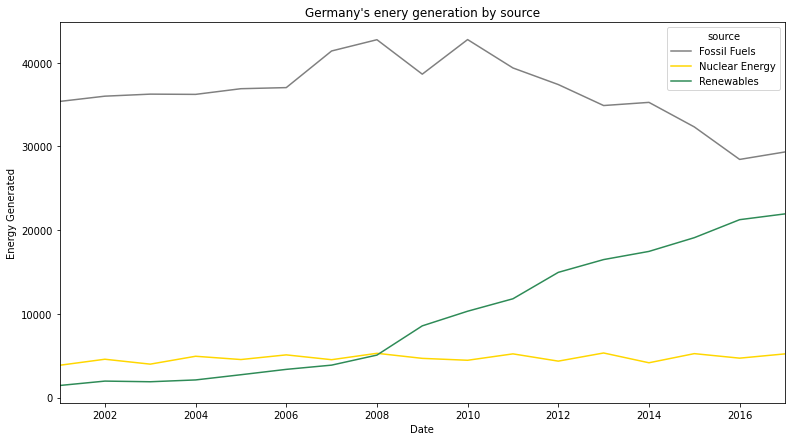

In [66]:
plt.figure(figsize=(13, 7))
sns.lineplot(x='year',
             y='net_generation',
             hue='source',
             data=df_generation,
             palette=('grey', 'gold', 'seagreen')
            )

plt.title("Germany's enery generation by source")
plt.xlabel('Date')
plt.ylabel('Energy Generated')
plt.xlim(df_generation.index.min(), df_generation.index.max());

Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [67]:
df_energy = df_generation.groupby(['source', 'year']).sum()

In [68]:
df_energy_table = df_energy.pivot_table(columns='source',
                                        index='year',
                                        values='net_generation')

In [69]:
df_energy_table

source,Fossil Fuels,Nuclear Energy,Renewables
year,,,
2001,35361,3853,1437
2002,35991,4574,1963
2003,36234,3988,1885
2004,36205,4929,2102
2005,36883,4538,2724
2006,37014,5095,3364
2007,41389,4519,3870
2008,42734,5282,5070
2009,38620,4679,8560


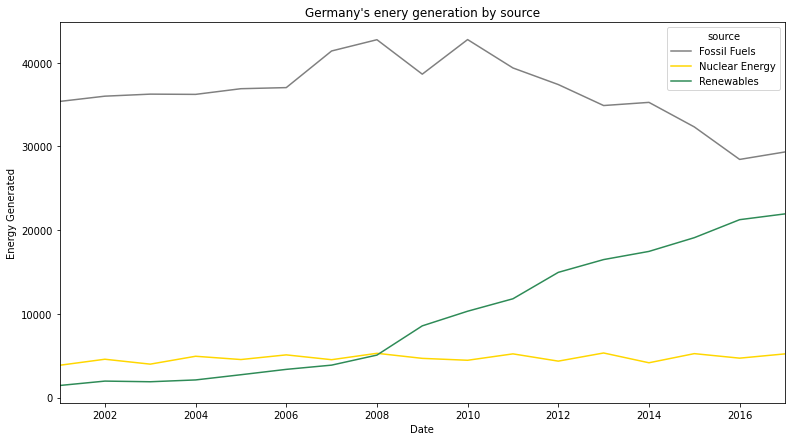

In [70]:
df_energy_table.plot(
    figsize=(13, 7),
    color=('grey', 'gold', 'seagreen')
)
plt.title("Germany's enery generation by source")
plt.xlabel('Date')
plt.ylabel('Energy Generated')
plt.xlim(df_energy_table.index.min(), df_energy_table.index.max());

Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

In [71]:
df_energy_table = df_energy_table.assign(
    annual_energy_total = df_energy_table.loc[:].sum(axis=1)
)

df_pct_energy_table = (
    
    df_energy_table.loc[:,:'Renewables'] \
    .divide(df_energy_table['annual_energy_total']
            ,axis=0)
)             

In [72]:
df_energy_table.loc[:,:'Renewables']

source,Fossil Fuels,Nuclear Energy,Renewables
year,,,
2001,35361,3853,1437
2002,35991,4574,1963
2003,36234,3988,1885
2004,36205,4929,2102
2005,36883,4538,2724
2006,37014,5095,3364
2007,41389,4519,3870
2008,42734,5282,5070
2009,38620,4679,8560


In [73]:
df_pct_energy_table

source,Fossil Fuels,Nuclear Energy,Renewables
year,,,
2001,0.869868,0.094782,0.035350
2002,0.846290,0.107553,0.046158
2003,0.860522,0.094711,0.044767
2004,0.837381,0.114002,0.048617
2005,0.835497,0.102798,0.061706
2006,0.813978,0.112045,0.073978
2007,0.831472,0.090783,0.077745
2008,0.804996,0.099499,0.095505
2009,0.744712,0.090225,0.165063


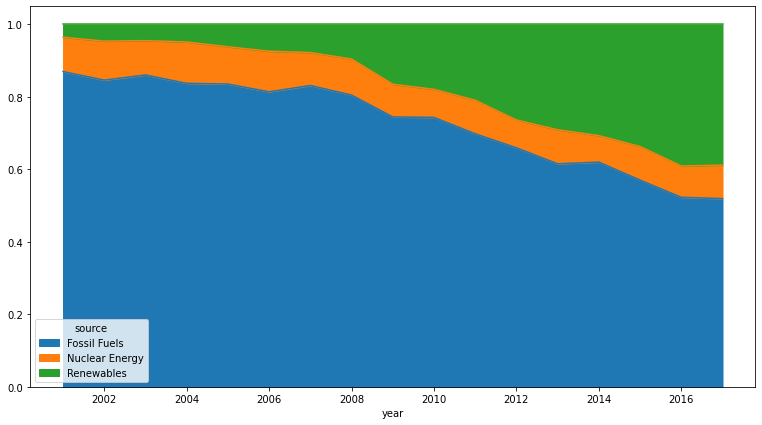

In [74]:
df_pct_energy_table.plot(figsize=(13, 7),
                         kind='area',
                         stacked=True);

Is the total generation increasing over time?
 > How would you control for increasing consumption over time when considering how much energy is coming from each source? express each number as a % of the year's total

In [75]:
pct_change_yoy = df_energy_table.diff(1)

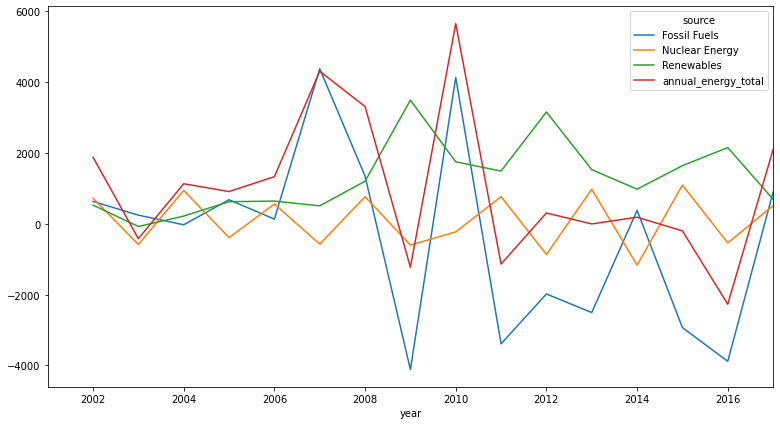

In [76]:
pct_change_yoy.plot(
    figsize=(13, 7),
    sharey=False
)

plt.xlim(pct_change_yoy.index.min(), pct_change_yoy.index.max());